# CODEATHON 3: Recognizing UVA landmarks with neural nets (50 pts)
![UVA Grounds](http://faculty.virginia.edu/lazzara/images/UVAgrounds.jpg) 

The UVA Grounds is known for its Jeffersonian architecture and place in U.S. history as a model for college and university campuses throughout the country. Throughout its history, the University of Virginia has won praises for its unique Jeffersonian architecture. 

In this codeathon, you will attempt the build an image recognition system to classify different buildlings/landmarks on Grounds. You will earn 50 points for this codeathon plus 10 bonus points if (1) your classifier performs exceed 95% accuracy OR you try at least 3 different architectures and able to analyze their performance.

To make it easier for you, some codes have been provided to help you process the data, you may modify it to fit your needs. You must submit the .ipynb file via UVA Collab with the following format: yourcomputingID_codeathon_3.ipynb

Best of luck, and have fun! 

# Load Packages

In [0]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

np.random.seed(49)
tf.random.set_seed(49)

# Import Dataset
The full dataset is huge (+37GB) with +13K images of 18 classes. So it will take a while to download, extract, and process. To save you time and effort, a subset of the data has been resized and compressed to only 379Mb and stored in my AWS server. This dataset will be the one you will benchmark for your grade. If you are up for a challenge (and perhaps bonus points), contact the instructor for the full dataset!

In [8]:
# Download dataset from AWS
!wget https://uvalandmark20.s3.amazonaws.com/dataset_split.zip

--2020-04-20 03:20:15--  https://uvalandmark20.s3.amazonaws.com/dataset_split.zip
Resolving uvalandmark20.s3.amazonaws.com (uvalandmark20.s3.amazonaws.com)... 52.216.29.124
Connecting to uvalandmark20.s3.amazonaws.com (uvalandmark20.s3.amazonaws.com)|52.216.29.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 397586818 (379M) [application/zip]
Saving to: ‘dataset_split.zip’

dataset_split.zip   100%[===================>] 379.17M  48.6MB/s    in 8.2s    

2020-04-20 03:20:24 (46.1 MB/s) - ‘dataset_split.zip’ saved [397586818/397586818]



In [0]:
# Extract content
!unzip "/content/dataset_split.zip"

In [0]:
from sklearn.datasets import load_files 
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


# define function to load train, test, and validation datasets
def load_dataset(path, num_classes):
    #Load text files with categories as subfolder names.
    data = load_files(path)
    filenames = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), num_classes)
    return filenames, targets

n_classes = 18;
# Make sure you create the class names that match the order of their appearances in the "files" variable
class_names = ['AcademicalVillage', 'AldermanLibrary', 'AlumniHall', 'AquaticFitnessCenter', 
  'BravoHall', 'BrooksHall', 'ClarkHall', 'MadisonHall', 'MinorHall', 'NewCabellHall', 
  'NewcombHall', 'OldCabellHall', 'OlssonHall', 'RiceHall', 'Rotunda', 'ScottStadium', 
  'ThorntonHall', 'UniversityChapel']

files, targets = load_dataset('/content/train/',n_classes)
# Split to train-validate-test sets. DO NOT CHANGE THE TEST RATIO OR RANDOM STATE
train_files, val_files, train_targets, val_targets = train_test_split(files, targets, test_size=0.2, random_state=49)

# IMPORTANCE: You must evaluate your performance based on this test set.
test_files, test_targets = load_dataset('/content/test/',n_classes)

In [12]:
from keras.preprocessing import image
from tqdm import tqdm # progress bar

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)           

# pre-process the data for Keras - Converts to (224, 224) and converts into a numpy array using PIL.
# NOTE: This code does not include any data augmentation, but you can modify it to include the augmentation operation.
X_train = paths_to_tensor(train_files).astype('float32')/255
X_val = paths_to_tensor(val_files).astype('float32')/255
X_test = paths_to_tensor(test_files).astype('float32')/255
# Convert y_targets into labels
y_train = np.asarray([np.where(r==1)[0][0] for r in train_targets], dtype=np.uint8)
y_test = np.asarray([np.where(r==1)[0][0] for r in test_targets], dtype=np.uint8)
y_val = np.asarray([np.where(r==1)[0][0] for r in val_targets], dtype=np.uint8)

100%|██████████| 1800/1800 [00:03<00:00, 566.36it/s]


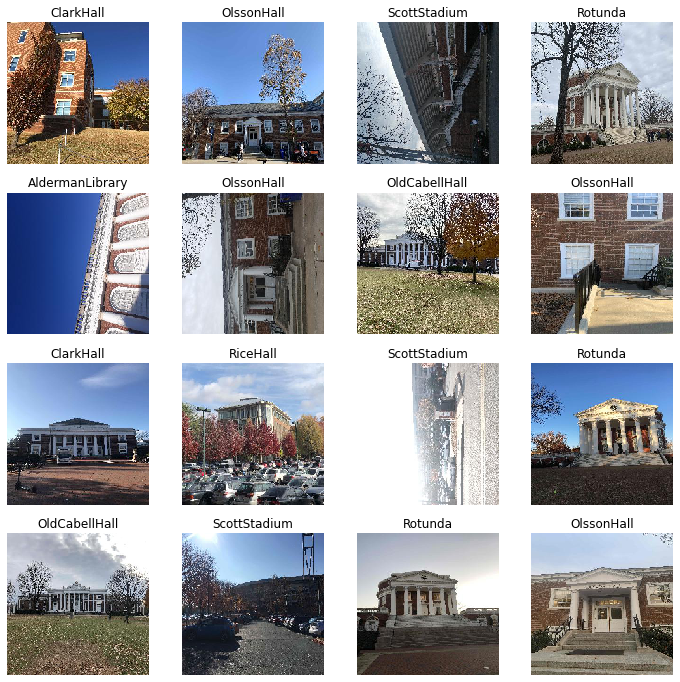

In [33]:
# Visualize some of the train samples
n_rows = 4
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)


# It's your turn: Building a classifier for UVA Landmark Dataset
You may design your own architecture OR re-use any of the exising frameworks. 

Best of luck!

In [0]:
#model 1
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
avg = keras.layers.Dense(1024, activation = 'relu')(avg)
avg = keras.layers.Dropout(0.3)(avg)
output = keras.layers.Dense(18, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

In [0]:
from keras.preprocessing import image
datagen = image.ImageDataGenerator(
    horizontal_flip=True,
    shear_range=0.2,
    rotation_range = 10
)
datagen.fit(X_train)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [67]:
for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
# history = model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val))
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) / 32, epochs=5, workers = 3)

Epoch 1/5
313/312 [==============================] - 127s 406ms/step - loss: 1.0705 - accuracy: 0.7153 - val_loss: 0.6321 - val_accuracy: 0.8357
Epoch 2/5
313/312 [==============================] - 125s 401ms/step - loss: 0.6205 - accuracy: 0.8354 - val_loss: 0.5018 - val_accuracy: 0.8669
Epoch 3/5
313/312 [==============================] - 125s 401ms/step - loss: 0.4835 - accuracy: 0.8700 - val_loss: 0.4534 - val_accuracy: 0.8772
Epoch 4/5
313/312 [==============================] - 125s 400ms/step - loss: 0.4379 - accuracy: 0.8811 - val_loss: 0.4188 - val_accuracy: 0.8872
Epoch 5/5
313/312 [==============================] - 125s 401ms/step - loss: 0.3908 - accuracy: 0.8950 - val_loss: 0.4065 - val_accuracy: 0.8916


In [71]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
# history = model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val))
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) / 32, epochs=5, workers = 3)


Epoch 1/5
313/312 [==============================] - 408s 1s/step - loss: 0.1527 - accuracy: 0.9586 - val_loss: 0.2259 - val_accuracy: 0.9552
Epoch 2/5
313/312 [==============================] - 403s 1s/step - loss: 0.1060 - accuracy: 0.9717 - val_loss: 0.1937 - val_accuracy: 0.9612
Epoch 3/5
313/312 [==============================] - 404s 1s/step - loss: 0.0753 - accuracy: 0.9787 - val_loss: 0.2083 - val_accuracy: 0.9660
Epoch 4/5
313/312 [==============================] - 403s 1s/step - loss: 0.0546 - accuracy: 0.9860 - val_loss: 0.2036 - val_accuracy: 0.9700
Epoch 5/5
313/312 [==============================] - 404s 1s/step - loss: 0.0451 - accuracy: 0.9878 - val_loss: 0.1833 - val_accuracy: 0.9708


In [72]:

model.evaluate(X_test, y_test)

57/57 [==============================] - 18s 308ms/step - loss: 0.9370 - accuracy: 0.8644


[0.937040388584137, 0.8644444346427917]

In [18]:
#Model 2

base_model2 = keras.applications.resnet50.ResNet50(weights= 'imagenet', include_top=False)
# base_model2 = ResNet50(weights='imagenet',include_top=False, input_shape=(299, 299, 3))
x = base_model2.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation = 'relu')(x)
x = keras.layers.Dropout(0.3)(x)
predictions = keras.layers.Dense(18, activation= 'softmax')(x)
model2 = keras.Model(inputs = base_model2.input, outputs = predictions)

94773248/94765736 [==============================] - 1s 0us/step


In [0]:
from keras.preprocessing import image
datagen = image.ImageDataGenerator(
    horizontal_flip=True,
    shear_range=0.2,
    rotation_range = 10
)
datagen.fit(X_train)

In [20]:
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
model2.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) / 32, epochs=20, workers = 3)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
313/312 [==============================] - 63s 201ms/step - loss: 2.8319 - accuracy: 0.1530 - val_loss: 2.8507 - val_accuracy: 0.1132
Epoch 2/20
313/312 [==============================] - 62s 197ms/step - loss: 2.6414 - accuracy: 0.1661 - val_loss: 3.2714 - val_accuracy: 0.1132
Epoch 3/20
313/312 [==============================] - 62s 197ms/step - loss: 2.6064 - accuracy: 0.1753 - val_loss: 2.6174 - val_accuracy: 0.1671
Epoch 4/20
313/312 [==============================] - 62s 197ms/step - loss: 2.5896 - accuracy: 0.1734 - val_loss: 2.5827 - val_accuracy: 0.1783
Epoch 5/20
313/312 [==============================] - 62s 197ms/step - loss: 2.5710 - accuracy: 0.1845 - val_loss: 2.5642 - val_accuracy: 0.1791
Epoch 6/20
313/312 [==============================] - 62s 197ms/step - loss: 2.5584 - accuracy: 0.1908 - val_loss: 2.5563 - val_accuracy: 0.1771
Epoch 7/20
313/312 [==============================] - 

In [22]:
model2.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) / 32, epochs=20, workers = 3)

Epoch 1/20
313/312 [==============================] - 62s 200ms/step - loss: 2.3539 - accuracy: 0.2496 - val_loss: 2.3662 - val_accuracy: 0.2407
Epoch 2/20
313/312 [==============================] - 63s 201ms/step - loss: 2.3345 - accuracy: 0.2559 - val_loss: 2.3338 - val_accuracy: 0.2495
Epoch 3/20
313/312 [==============================] - 62s 197ms/step - loss: 2.3105 - accuracy: 0.2690 - val_loss: 2.4734 - val_accuracy: 0.2083
Epoch 4/20
313/312 [==============================] - 61s 196ms/step - loss: 2.2939 - accuracy: 0.2681 - val_loss: 2.2856 - val_accuracy: 0.2715
Epoch 5/20
313/312 [==============================] - 61s 196ms/step - loss: 2.2786 - accuracy: 0.2802 - val_loss: 2.4602 - val_accuracy: 0.2263
Epoch 6/20
313/312 [==============================] - 61s 196ms/step - loss: 2.2610 - accuracy: 0.2841 - val_loss: 2.2251 - val_accuracy: 0.2851
Epoch 7/20
313/312 [==============================] - 61s 196ms/step - loss: 2.2275 - accuracy: 0.2949 - val_loss: 2.2578 - val_ac

In [24]:
model2.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) / 32, epochs=20, workers = 3)

Epoch 1/20
313/312 [==============================] - 62s 197ms/step - loss: 1.8327 - accuracy: 0.4176 - val_loss: 2.0285 - val_accuracy: 0.3515
Epoch 2/20
313/312 [==============================] - 61s 196ms/step - loss: 1.7974 - accuracy: 0.4299 - val_loss: 1.8311 - val_accuracy: 0.4186
Epoch 3/20
313/312 [==============================] - 61s 196ms/step - loss: 1.7791 - accuracy: 0.4328 - val_loss: 2.1066 - val_accuracy: 0.3579
Epoch 4/20
313/312 [==============================] - 61s 196ms/step - loss: 1.7526 - accuracy: 0.4445 - val_loss: 1.7853 - val_accuracy: 0.4306
Epoch 5/20
313/312 [==============================] - 61s 195ms/step - loss: 1.7168 - accuracy: 0.4598 - val_loss: 1.7914 - val_accuracy: 0.4430
Epoch 6/20
313/312 [==============================] - 61s 196ms/step - loss: 1.6900 - accuracy: 0.4558 - val_loss: 2.0276 - val_accuracy: 0.3659
Epoch 7/20
313/312 [==============================] - 61s 196ms/step - loss: 1.6745 - accuracy: 0.4699 - val_loss: 1.7333 - val_ac

In [26]:
model2.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) / 32, epochs=30, workers = 4)

Epoch 1/30
313/312 [==============================] - 62s 198ms/step - loss: 1.2609 - accuracy: 0.6110 - val_loss: 1.3308 - val_accuracy: 0.5866
Epoch 2/30
313/312 [==============================] - 62s 197ms/step - loss: 1.2462 - accuracy: 0.6124 - val_loss: 1.4777 - val_accuracy: 0.5674
Epoch 3/30
313/312 [==============================] - 61s 196ms/step - loss: 1.2145 - accuracy: 0.6307 - val_loss: 1.3571 - val_accuracy: 0.6026
Epoch 4/30
313/312 [==============================] - 61s 196ms/step - loss: 1.1972 - accuracy: 0.6269 - val_loss: 1.3109 - val_accuracy: 0.5978
Epoch 5/30
313/312 [==============================] - 61s 196ms/step - loss: 1.1550 - accuracy: 0.6457 - val_loss: 1.3004 - val_accuracy: 0.6130
Epoch 6/30
313/312 [==============================] - 61s 196ms/step - loss: 1.1278 - accuracy: 0.6507 - val_loss: 1.2922 - val_accuracy: 0.6090
Epoch 7/30
313/312 [==============================] - 61s 196ms/step - loss: 1.1282 - accuracy: 0.6522 - val_loss: 1.2910 - val_ac

In [28]:
model2.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) / 32, epochs=20, workers = 4)

Epoch 1/20
313/312 [==============================] - 62s 198ms/step - loss: 0.6860 - accuracy: 0.7929 - val_loss: 0.9970 - val_accuracy: 0.7289
Epoch 2/20
313/312 [==============================] - 62s 197ms/step - loss: 0.6674 - accuracy: 0.8011 - val_loss: 1.0208 - val_accuracy: 0.7121
Epoch 3/20
313/312 [==============================] - 62s 197ms/step - loss: 0.6633 - accuracy: 0.8000 - val_loss: 0.9301 - val_accuracy: 0.7393
Epoch 4/20
313/312 [==============================] - 62s 197ms/step - loss: 0.6290 - accuracy: 0.8137 - val_loss: 0.8695 - val_accuracy: 0.7565
Epoch 5/20
313/312 [==============================] - 62s 197ms/step - loss: 0.6193 - accuracy: 0.8116 - val_loss: 0.8924 - val_accuracy: 0.7573
Epoch 6/20
313/312 [==============================] - 62s 197ms/step - loss: 0.6251 - accuracy: 0.8150 - val_loss: 0.9050 - val_accuracy: 0.7553
Epoch 7/20
313/312 [==============================] - 62s 197ms/step - loss: 0.6115 - accuracy: 0.8174 - val_loss: 0.8406 - val_ac

In [29]:
model2.evaluate(X_test, y_test)

57/57 [==============================] - 3s 55ms/step - loss: 1.8732 - accuracy: 0.5611


[1.8731648921966553, 0.5611110925674438]

In [0]:
#model 4
base_model4 = keras.applications.inception_v3.InceptionV3(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model4.output)
avg = keras.layers.Dense(1024, activation = 'relu')(avg)
avg = keras.layers.Dropout(0.3)(avg)
output = keras.layers.Dense(18, activation="softmax")(avg)
model4 = keras.Model(inputs=base_model4.input, outputs=output)

from keras.preprocessing import image
datagen = image.ImageDataGenerator(
    horizontal_flip=True,
    shear_range=0.2,
    rotation_range = 10
)
datagen.fit(X_train)


In [34]:
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model4.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
model4.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) / 32, epochs=50, workers = 3)

Epoch 1/50
313/312 [==============================] - 61s 194ms/step - loss: 2.7387 - accuracy: 0.1195 - val_loss: 2.7574 - val_accuracy: 0.1204
Epoch 2/50
313/312 [==============================] - 58s 184ms/step - loss: 2.7260 - accuracy: 0.1305 - val_loss: 2.7482 - val_accuracy: 0.1267
Epoch 3/50
313/312 [==============================] - 58s 186ms/step - loss: 2.7169 - accuracy: 0.1374 - val_loss: 2.7402 - val_accuracy: 0.1291
Epoch 4/50
313/312 [==============================] - 58s 185ms/step - loss: 2.7084 - accuracy: 0.1397 - val_loss: 2.7323 - val_accuracy: 0.1355
Epoch 5/50
313/312 [==============================] - 57s 183ms/step - loss: 2.6984 - accuracy: 0.1452 - val_loss: 2.7178 - val_accuracy: 0.1367
Epoch 6/50
313/312 [==============================] - 57s 183ms/step - loss: 2.6911 - accuracy: 0.1462 - val_loss: 2.7141 - val_accuracy: 0.1399
Epoch 7/50
313/312 [==============================] - 58s 186ms/step - loss: 2.6856 - accuracy: 0.1482 - val_loss: 2.6881 - val_ac

In [35]:
model4.evaluate(X_test, y_test)

57/57 [==============================] - 3s 46ms/step - loss: 2.7746 - accuracy: 0.1972


[2.7745754718780518, 0.19722221791744232]

In [36]:
model4.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) / 32, epochs=30, workers = 3)

Epoch 1/30
313/312 [==============================] - 56s 180ms/step - loss: 1.8906 - accuracy: 0.4058 - val_loss: 1.9017 - val_accuracy: 0.3934
Epoch 2/30
313/312 [==============================] - 56s 178ms/step - loss: 1.8452 - accuracy: 0.4149 - val_loss: 1.8763 - val_accuracy: 0.4018
Epoch 3/30
313/312 [==============================] - 55s 175ms/step - loss: 1.8393 - accuracy: 0.4171 - val_loss: 1.8990 - val_accuracy: 0.3962
Epoch 4/30
313/312 [==============================] - 55s 175ms/step - loss: 1.8223 - accuracy: 0.4268 - val_loss: 1.8706 - val_accuracy: 0.4106
Epoch 5/30
313/312 [==============================] - 56s 179ms/step - loss: 1.8098 - accuracy: 0.4303 - val_loss: 1.8529 - val_accuracy: 0.4114
Epoch 6/30
313/312 [==============================] - 56s 178ms/step - loss: 1.7894 - accuracy: 0.4342 - val_loss: 1.8612 - val_accuracy: 0.4138
Epoch 7/30
313/312 [==============================] - 55s 175ms/step - loss: 1.7667 - accuracy: 0.4449 - val_loss: 1.8361 - val_ac

In [37]:
model4.evaluate(X_test, y_test)

57/57 [==============================] - 3s 46ms/step - loss: 2.7060 - accuracy: 0.2778


[2.706045389175415, 0.2777777910232544]

In [38]:
model4.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) / 32, epochs=30, workers = 3)

Epoch 1/30
313/312 [==============================] - 56s 179ms/step - loss: 1.3799 - accuracy: 0.5666 - val_loss: 1.5511 - val_accuracy: 0.5346
Epoch 2/30
313/312 [==============================] - 55s 176ms/step - loss: 1.3461 - accuracy: 0.5772 - val_loss: 1.5200 - val_accuracy: 0.5498
Epoch 3/30
313/312 [==============================] - 55s 176ms/step - loss: 1.3296 - accuracy: 0.5889 - val_loss: 1.5220 - val_accuracy: 0.5346
Epoch 4/30
313/312 [==============================] - 55s 176ms/step - loss: 1.3238 - accuracy: 0.5886 - val_loss: 1.4839 - val_accuracy: 0.5570
Epoch 5/30
313/312 [==============================] - 55s 175ms/step - loss: 1.2926 - accuracy: 0.5963 - val_loss: 1.5183 - val_accuracy: 0.5586
Epoch 6/30
313/312 [==============================] - 55s 177ms/step - loss: 1.2952 - accuracy: 0.5918 - val_loss: 1.4918 - val_accuracy: 0.5466
Epoch 7/30
313/312 [==============================] - 55s 174ms/step - loss: 1.2702 - accuracy: 0.6037 - val_loss: 1.4597 - val_ac

In [39]:
model4.evaluate(X_test, y_test)

57/57 [==============================] - 3s 46ms/step - loss: 2.8512 - accuracy: 0.3183


[2.851243734359741, 0.31833332777023315]

#Summary

I tried three different models: with the first one being Xception, the second one being ResNet50, and the third one being InceptionV3. (The third model was named as model4 because I deleted my model3.)

Xception has the best performance. It acheived 97% accuracy on the validation set and 86% on test set. I first generated some new photos by flipping all the X_train photos horizontally and rotating them with 10 degrees. Then, I trained the model with base model layers locked for 5 epochs then another 5 epochs with the base model layers unlocked. I chose not to train more to avoid overfitting. Xception has a very strong base model as the model can achieve 97% accuracy on validation set with 10 epochs of training.
On the other hand, the other two models perform a lot worse. I generated photos for these two models as well and trained each moedel for 110-120 epochs. My computer keeps on crashing if I train more, so I have to stop at 120 epochs. After 120 epochs of training, the second model achieved 76% validation set accuracy and 56% test set accuracy, while the third model achieved 64% validation set accuracy and 32% test set accuracy. The learning curve is pretty slow for both models, and I've tried to increase the learning rate to 0.25 or 0.3, but there was no significant improvement. 